# Data Preparation

## 1. Load and Preview Data

In [ ]:
# Get required packages
import pandas as pd
import numpy as np
import json
import gzip
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO


In [16]:
# Folder path to meta dataset
fp_meta = r"AMAZON_FASHION_5core_meta.json.gz"      # 5-core metadata
fp_review = r"reviews_AMAZON_FASHION.csv.gz"        # Reviews data
fp_test = r"meta_AMAZON_FASHION.json"            # Original metadata 


# Functions to read json file and convert into pandas dataframe
def parse_gz_jsonl(path):
    with gzip.open(path, "rt", encoding="utf-8") as f:
        for line in f:
            yield json.loads(line.strip())

def getDF_jsonl_gz(path):
    data_list = list(parse_gz_jsonl(path))
    return pd.DataFrame(data_list)


df_5core = getDF_jsonl_gz(fp_meta)             # 5-core metadata
df_review = pd.read_csv(fp_review)              # Reviews data
df_meta = pd.read_json(fp_test, lines=True)    # Original metadata

In [ ]:
# Preview the 5core fashion dataframe
df_5core.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...",Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN
3172,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,"{'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...",J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN
3173,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,"{'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...",Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN
3174,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...",Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN


In [ ]:
# Preview the original fashion dataframe
df_meta.head()

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,[Package Dimensions:\n \n8....,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,[Package Dimensions:\n \n10...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$4.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186632,JT Women's Elegant Off Shoulder Chiffon Maxi L...,JT,NaN,"9,835,890inClothing,ShoesJewelry(",5 star,B01HJGXL4O,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186633,Microcosm Retro Vintage Black Crochet Lace One...,Microcosm,[Package Dimensions:\n \n7....,"11,390,771inClothing,ShoesJewelry(",5 star5 star (0%),B01HJHF97K,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186634,Lookatool Classic Plain Vintage Army Military ...,Lookatool,"[Cotton+Polyester, Imported, Item type:Basebal...","972,275inClothing,ShoesJewelry(",5 star,B01HJGJ9LS,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$8.53,"[B00XLECZMS, B0018MQAOY, B00N833I4Q, B074DQSPP...","[B07BHQ1FXL, B00XLECZMS, B07CJWM5WY, B07CS97C1...","class=""a-normal a-align-center a-spacing-smal...",NaN,NaN,NaN
186635,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,B01HJHTH5U,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN


In [17]:
# Column names for original metadata
headers1 = list(df_meta.columns)
print("Original metadata:", headers1)

# Column names for 5-core metadata
headers2 = list(df_5core.columns)
print("5-core metadata:", headers2)

Original metadata: ['title', 'brand', 'feature', 'rank', 'date', 'asin', 'imageURL', 'imageURLHighRes', 'description', 'price', 'also_view', 'also_buy', 'fit', 'details', 'similar_item', 'tech1']
5-core metadata: ['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'image']


## 2. Data Cleaning

### (a) Handle Duplicate Values

In [18]:
# Check for duplicates in original metadata
nrows = len(df_meta['asin'].unique())
print(f"There are {nrows} unique 'asin' in test dataframe")
print(f"There are {df_meta.shape[0]} total rows in test dataframe")

if nrows == df_meta.shape[0]:
    print("No duplicates product IDs")
else:
    print("Duplicates of product IDs exist")

print("")

# Check for duplicates in 5-core metadata
nrows = len(df_5core['asin'].unique())
print(f"There are {nrows} unique 'asin' in 5core dataframe")
print(f"There are {df_5core.shape[0]} total rows in 5core dataframe")

if nrows == df_5core.shape[0]:
    print("No duplicates product IDs in 5core")
else:
    print("Duplicates of product IDs exist in 5core")

There are 186194 unique 'asin' in test dataframe
There are 186637 total rows in test dataframe
Duplicates of product IDs exist

There are 31 unique 'asin' in 5core dataframe
There are 3176 total rows in 5core dataframe
Duplicates of product IDs exist in 5core


In [19]:
# `asin` refers to the ID of the product and is unique for each product. 
# Hence, we will remove duplicate products based on `asin`, keeping only the first occurence.
df_meta = df_meta.drop_duplicates(subset='asin', keep='first')

# As 5core is a review table, there will be duplicates of `asin` as each product can have multiple reviews.
# We will remove duplicates based on `image` instead
df_5core['image_str'] = df_5core['image'].astype(str)  # Convert lists to strings
df_5core = df_5core.drop_duplicates(subset=['image_str'])  # Drop duplicates
df_5core = df_5core.drop(columns=['image_str'])  # Remove helper column

### (b) Handle Missing Values

In [21]:
# Check missing values
missing_meta = df_meta.isnull().sum()
missing_5core = df_5core.isnull().sum()

# Drop rows where asin is missing, as product record is likely not valid
df_meta = df_meta.dropna(subset=['asin'])  
df_5core = df_5core.dropna(subset=['asin'])

### (c) Data Type Conversion

In [22]:
# Check data types
data_types_meta = df_meta.dtypes
data_types_5core = df_5core.dtypes

print("Data types for original metadata:", data_types_meta)
print("Data types for 5-core metadata:", data_types_5core)

# Convert 'reviewTime' to datetime in df_5core
df_5core['reviewTime'] = pd.to_datetime(df_5core['reviewTime'], errors='coerce')

Data types for original metadata: title              object
brand              object
feature            object
rank               object
date               object
asin               object
imageURL           object
imageURLHighRes    object
description        object
price              object
also_view          object
also_buy           object
fit                object
details            object
similar_item       object
tech1              object
dtype: object
Data types for 5-core metadata: overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
image              object
dtype: object


### (d) Handle Irrelevant Features

#### `df_meta`

In [23]:
# Drop irrelevant 'date' column (contains no date information)
df_meta = df_meta.drop(columns=['date'])

# Calculate the percentage of NaN values in each column
na_percentage = df_meta.isna().mean() * 100
print(na_percentage)

# Display columns with more than 80% missing values
columns_to_drop = na_percentage[na_percentage > 80].index
print(columns_to_drop)

# Drop the columns with more than 80% NaN values and are unused in analysis
df_meta = df_meta.drop(columns=columns_to_drop)

title               0.002685
brand              24.984156
feature            33.515581
rank                3.404514
asin                0.000000
imageURL           29.208782
imageURLHighRes    29.208782
description        91.574916
price              90.446524
also_view          93.780680
also_buy           88.378788
fit                97.407543
details            99.525763
similar_item       99.829747
tech1              99.947904
dtype: float64
Index(['description', 'price', 'also_view', 'also_buy', 'fit', 'details',
       'similar_item', 'tech1'],
      dtype='object')


In [24]:
# Preview the cleaned dataframe
df_meta.head()

,title,brand,feature,rank,asin,imageURL,imageURLHighRes
0,"Slime Time Fall Fest [With CDROM and Collector Cards and Neutron Balls, Incredi-Ball and Glow Stick Necklace, Paper Fram",Group Publishing (CO),"[Product Dimensions:\n \n8.7 x 3.6 x 11.4 inches, Shipping Weight:\n \n2.4 pounds]","13,052,976inClothing,Shoesamp;Jewelry(",0764443682,[https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL._US40_.jpg],[https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg]
1,XCC Qi promise new spider snake preparing men's accessories alloy fittings magnet buckle bracelet jewelry,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",1291691480,"[https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL._US40_.jpg, https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL._US40_.jpg, https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL._US40_.jpg]","[https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL.jpg, https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL.jpg, https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL.jpg]"
2,Magical Things I Really Do Do Too!,Christopher Manos,"[Package Dimensions:\n \n8.5 x 5.5 x 0.4 inches, Shipping Weight:\n \n6.1 ounces]","19,308,073inClothing,ShoesJewelry(",1940280001,"[https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL._SR38,50_.jpg, https://images-na.ssl-images-amazon.com/images/I/31N2zBaedSL._SR38,50_.jpg]","[https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg, https://images-na.ssl-images-amazon.com/images/I/31N2zBaedSL.jpg]"
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,"[Package Dimensions:\n \n8.3 x 5.5 x 0.3 inches, Shipping Weight:\n \n5.6 ounces]","19,734,184inClothing,ShoesJewelry(",1940735033,"[https://images-na.ssl-images-amazon.com/images/I/41VHFlSGjoL._SR38,50_.jpg]",[https://images-na.ssl-images-amazon.com/images/I/41VHFlSGjoL.jpg]
4,Aether & Empire #1 - 2016 First Printing Comic Book Special Edition - Rare! - Blue Juice Comics,NaN,"[Package Dimensions:\n \n10.5 x 6.5 x 0.2 inches, Shipping Weight:\n \n6.4 ounces (View shipping rates and policies)]","10,558,646inClothing,Shoesamp;Jewelry(",1940967805,"[https://images-na.ssl-images-amazon.com/images/I/418HGjTDbRL._SR38,50_.jpg]",[https://images-na.ssl-images-amazon.com/images/I/418HGjTDbRL.jpg]


#### `df_5core`

In [25]:
# Drop irrelevant columns (not needed in analysis)
df_5core = df_5core.drop(columns=['unixReviewTime', 'vote'])

In [26]:
# Preview the cleaned dataframe
df_5core.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,image
0,5.0,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,NaN
164,5.0,True,2018-04-18,A2YZERYQTLB8NG,B001IKJOLW,"{'Size:': ' 9.5 B(M) US', 'Color:': ' Black/White/Anthracite/Stealth'}",Lenci,Best tennis shoes I've had all my life. Very comfortable out the box. I would buy 10 pairs of these shoes if had the money.,Very Comfortable,[https://images-na.ssl-images-amazon.com/images/I/71MxdEmUNpL._SY88.jpg]
172,5.0,True,2018-04-07,A1CKPC88NHMYGR,B001IKJOLW,"{'Size:': ' 11 B(M) US', 'Color:': ' Wolf Grey/Black-pink Blast/White'}",Cynthia Foyer,NaN,Five Stars,[https://images-na.ssl-images-amazon.com/images/I/61ifu-JvzQL._SY88.jpg]
179,5.0,True,2018-03-22,A3KKVVAINMZF9D,B001IKJOLW,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/Green Glow/Hasta/White'}",Nadege Marcellus,"Straight out of the box, these shoes are great! Very lightweight and fits comfortably on my feet like a glove! I love most especially that the sole is not bulky like my previous running shoes I hated those things lol! I would give them a shot and they are great for the price!",these shoes are great! Very lightweight and fits comfortably on my feet ...,"[https://images-na.ssl-images-amazon.com/images/I/61nv8h45pHL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/71mOYBlBnAL._SY88.jpg, https://images-na.ssl-images-amazon.com/images/I/619NiK+tIRL._SY88.jpg]"
192,5.0,True,2018-02-27,A3TLWN2BRF1QH5,B001IKJOLW,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Blue Tint/Green Glow/Hasta/White'}",Brittany C.,These are so cute and comfortable and very light. I just received them today and the fit is perfect. I normally wear an 8 1/2 and they are true to size!,Great fit!,[https://images-na.ssl-images-amazon.com/images/I/81RTR7fHytL._SY88.jpg]


## 3. Data Tranformation

### (a) Creating New Tables: `catalogue` table

In [27]:
# Drop unnecessary columns (not needed for analysis)
catalogue = df_meta.drop(columns=['rank', 'imageURL'])

# Dimension of catalogue: 186194 rows and 8 columns
print(catalogue.shape)

# Check Null values in imageURLHighRes column: 54385 null values
null_count = catalogue['imageURLHighRes'].isnull().sum()
print(null_count)

# Drop rows where 'imageURLHighRes' is null
catalogue = catalogue.dropna(subset=['imageURLHighRes'])

(186194, 5)
54385


In [28]:
# Preview catalogue table
catalogue.head()

,title,brand,feature,asin,imageURLHighRes
0,"Slime Time Fall Fest [With CDROM and Collector Cards and Neutron Balls, Incredi-Ball and Glow Stick Necklace, Paper Fram",Group Publishing (CO),"[Product Dimensions:\n \n8.7 x 3.6 x 11.4 inches, Shipping Weight:\n \n2.4 pounds]",0764443682,[https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg]
1,XCC Qi promise new spider snake preparing men's accessories alloy fittings magnet buckle bracelet jewelry,NaN,NaN,1291691480,"[https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL.jpg, https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL.jpg, https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL.jpg]"
2,Magical Things I Really Do Do Too!,Christopher Manos,"[Package Dimensions:\n \n8.5 x 5.5 x 0.4 inches, Shipping Weight:\n \n6.1 ounces]",1940280001,"[https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg, https://images-na.ssl-images-amazon.com/images/I/31N2zBaedSL.jpg]"
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,"[Package Dimensions:\n \n8.3 x 5.5 x 0.3 inches, Shipping Weight:\n \n5.6 ounces]",1940735033,[https://images-na.ssl-images-amazon.com/images/I/41VHFlSGjoL.jpg]
4,Aether & Empire #1 - 2016 First Printing Comic Book Special Edition - Rare! - Blue Juice Comics,NaN,"[Package Dimensions:\n \n10.5 x 6.5 x 0.2 inches, Shipping Weight:\n \n6.4 ounces (View shipping rates and policies)]",1940967805,[https://images-na.ssl-images-amazon.com/images/I/418HGjTDbRL.jpg]


### (b) Creating New Tables: `catalogue_images` table

In [29]:
# Create a separate table for image links, with original 'images' column pivoted out into different image types for each row of data
links = df_meta["imageURLHighRes"].explode()
catalogue_images = pd.DataFrame(df_meta['asin']).join(links)

# Preview catalogue_images dataframe
catalogue_images.head()

,asin,imageURLHighRes
0,0764443682,https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg
1,1291691480,https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL.jpg
1,1291691480,https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL.jpg
1,1291691480,https://images-na.ssl-images-amazon.com/images/I/51twQYJo0NL.jpg
2,1940280001,https://images-na.ssl-images-amazon.com/images/I/4196%2BTu5T%2BL.jpg


### (c) Creating New Tables: `base` table

In [30]:
# This table is based on df_5core which is a review table
# This table can be populated/modified to create sales table and inventory table

# Removing products that are not in our catalogue
# Filter rows in df_5core where the 'asin' is in catalogue['asin']
base = df_5core[df_5core['asin'].isin(catalogue['asin'])]

### Preview Sample of Images (from 5-core metadata, and first 10 original metadata)

There are 21 unique image links in 5core metadata
https://images-na.ssl-images-amazon.com/images/I/71MxdEmUNpL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/61ifu-JvzQL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/61nv8h45pHL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71mOYBlBnAL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/619NiK+tIRL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81RTR7fHytL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71Q1TDIUL6L._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81-b35fKqUL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/716r65w8StL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/714tarywrwL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/718Y-qb+NUL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81mJY5XtKRL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71v+pR+F9YL._SY88.jpg
https://images-na.ssl-image

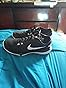

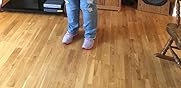

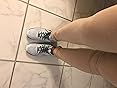

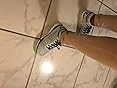

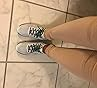

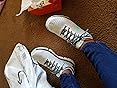

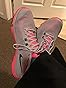

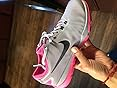

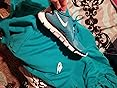

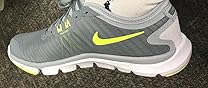

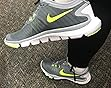

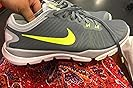

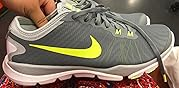

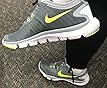

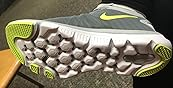

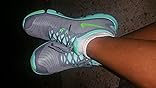

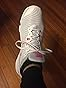

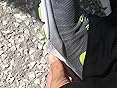

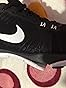

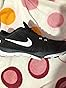

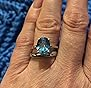

In [31]:
# Get unique image links
image_links = df_5core['image'].explode()[1:]   # the first image link is NA
print(f"There are {len(image_links)} unique image links in 5core metadata")

# Check unique images urls
for url in image_links:
    print(url, flush=True)

# Preview unique images available in dataset
for url in image_links:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    display(image)

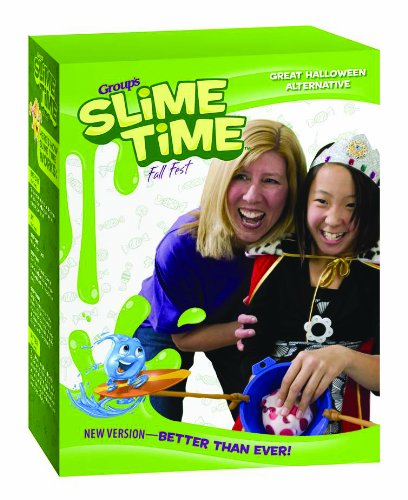

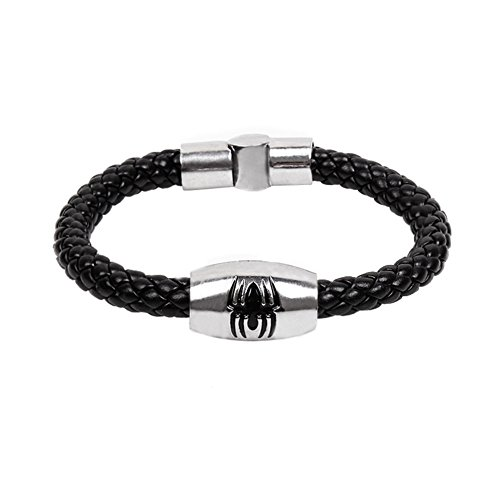

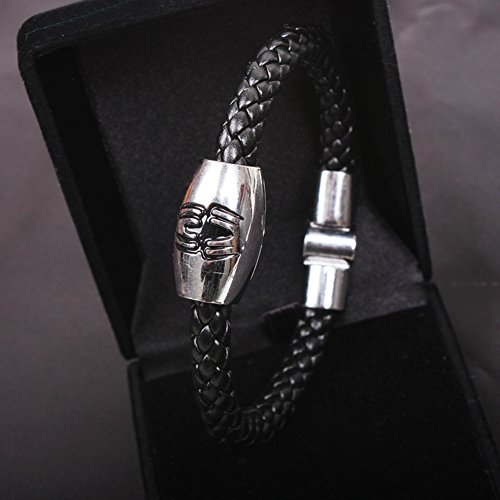

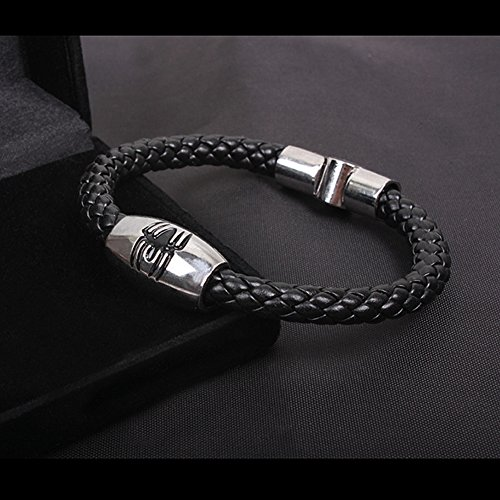

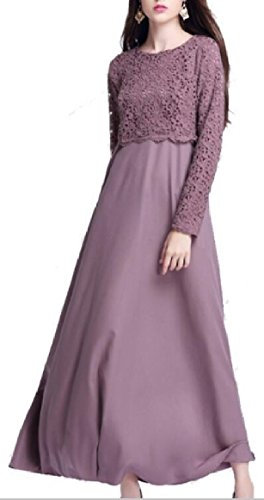

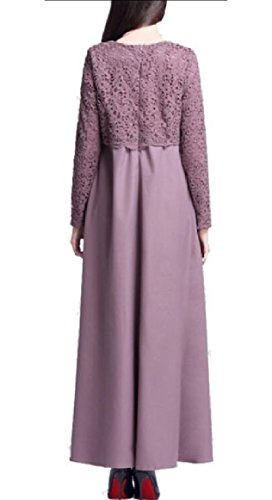

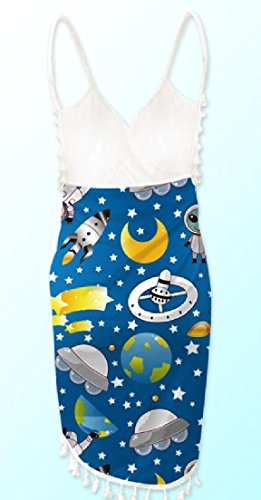

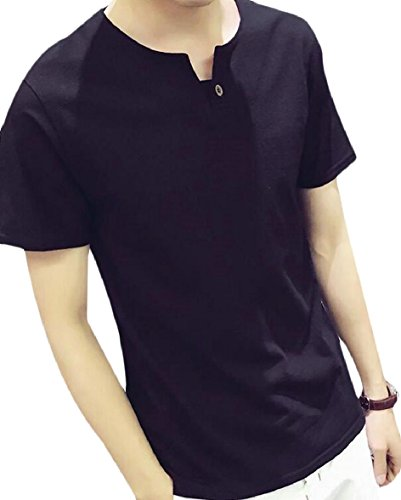

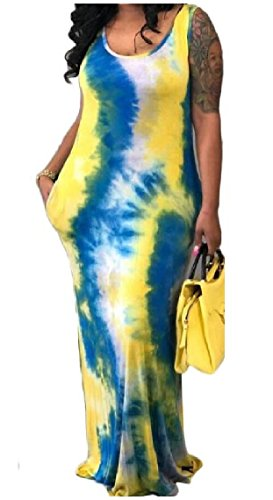

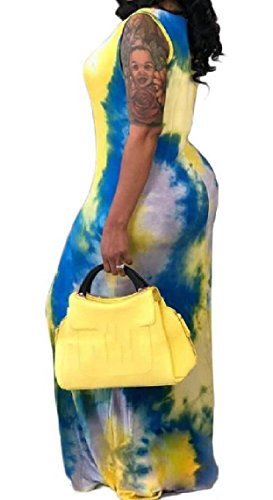

In [32]:
for url in catalogue_images['imageURLHighRes'][:10]:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    display(image)

In [33]:
# Set display options to prevent text from being cut off
pd.set_option('display.max_colwidth', None)  # No limit on column width
catalogue_images[100:]

,asin,imageURLHighRes
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/41SyGjt4KdL.jpg
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/41FEcB5bw5L.jpg
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/516JbzHiIAL.jpg
42,B000073209,https://images-na.ssl-images-amazon.com/images/I/51hHfVflNsL.jpg
43,B0000732EP,https://images-na.ssl-images-amazon.com/images/I/41EFWJXZ26L.jpg
...,...,...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/41UsykdVCQL.jpg
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/51dMXZ%2B2ZVL.jpg
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/41dicQiHMOL.jpg
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images/I/516wjTOoS%2BL.jpg
